In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_covid=pd.read_csv("aggregate_covid_country.csv",parse_dates=["Date"])

In [17]:
df_covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [18]:
df_covid.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

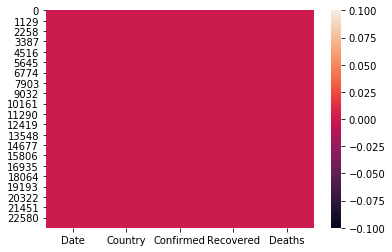

In [19]:
#checking whether is null value or not
import seaborn as sns
sns.heatmap(df_covid.isnull())
plt.show()

In [20]:
df_covid.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [26]:
#from dates we can get monthly,yearly,daily death count of covid which can help in data analysis

df_covid_dates=pd.DataFrame()
df_covid_dates["month"]=df_covid["Date"].dt.month_name()
df_covid_dates["year"]=df_covid["Date"].dt.year
df_covid_dates["day"]=df_covid["Date"].dt.day_name()
df_covid_dates["Deaths"]=df_covid["Deaths"]
df_covid_dates

,month,year,day,Deaths
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,3
23684,May,2020,Tuesday,1
23685,May,2020,Tuesday,49
23686,May,2020,Tuesday,7


In [28]:
df_covid_dates.head(20)

,month,year,day,Deaths
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
5,January,2020,Wednesday,0
6,January,2020,Wednesday,0
7,January,2020,Wednesday,0
8,January,2020,Wednesday,0
9,January,2020,Wednesday,0


In [22]:
df_covid.shape

(23688, 5)

In [24]:
df_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,23688.0,7969.367528,58421.090425,0.0,0.0,18.0,730.0,1680913.0
Recovered,23688.0,2581.801714,15143.101257,0.0,0.0,1.0,123.0,384902.0
Deaths,23688.0,526.935030,3992.815956,0.0,0.0,0.0,13.0,98913.0


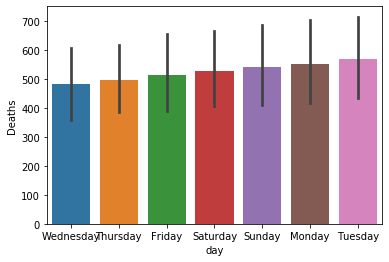

In [29]:
#average death during days of week
sns.barplot(x="day",y="Deaths",data=df_covid_dates)
plt.show()

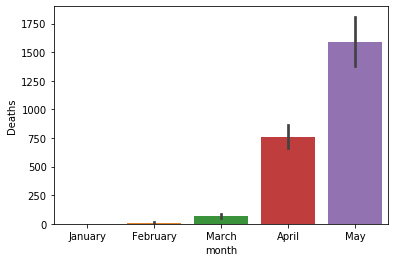

In [30]:
#average deaths during months
sns.barplot(x="month",y="Deaths",data=df_covid_dates)
plt.show()

#it shows average deaths  increasing in feb to may

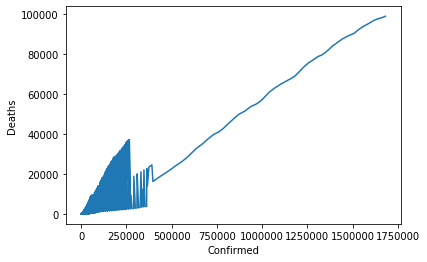

In [32]:
#checking how much confirmed goes to death
sns.lineplot(x="Confirmed",y="Deaths",data=df_covid)
plt.show()

In [33]:
df_covid.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
le=LabelEncoder()
list1=['Country']
for val in list1:
    df_covid[val]=le.fit_transform(df_covid[val].astype(str))

In [39]:
df_covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0
...,...,...,...,...,...
23683,2020-05-26,183,429,365,3
23684,2020-05-26,184,9,6,1
23685,2020-05-26,185,249,10,49
23686,2020-05-26,186,920,336,7


In [41]:
df_covid.corr()

,Country,Confirmed,Recovered,Deaths
Country,1.000000,0.069204,0.019298,0.064954
Confirmed,0.069204,1.000000,0.810991,0.929718
Recovered,0.019298,0.810991,1.000000,0.778094
Deaths,0.064954,0.929718,0.778094,1.000000


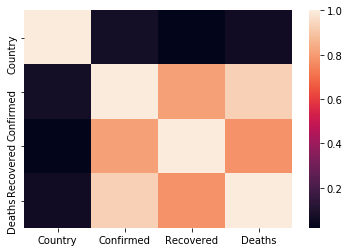

In [42]:
sns.heatmap(df_covid.corr())

In [43]:
#separating into input and output variable
df_x=df_covid.drop(columns=['Deaths','Date'])
y=pd.DataFrame(df_covid["Deaths"])

In [45]:
#scaling the input var
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [46]:
x.skew()

Country     -1.508139e-16
Confirmed    1.867450e+01
Recovered    1.066229e+01
dtype: float64

In [47]:
#her we will find out random state value max
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state

print("maxr2 score",final_r_state,"is",max_r_score)


maxr2 score 96 is 0.9244178095699497


In [48]:
#lets use cross val score to check it is overfitting or not
from sklearn.model_selection import cross_val_score
score=cross_val_score(linear_model.LinearRegression(),x,y,cv=6,scoring="r2")
score

array([-2.01832721, -0.20289731,  0.47622099,  0.75344378,  0.85687779,
        0.87273671])

In [49]:
# final model

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 96,test_size=0.20)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is:",r2_score(y_test,y_pred))
print("RMSE is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9244178095699497
RMSE is 1351.760407451598


# Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr=RandomForestRegressor(n_estimators=300,random_state=46)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)*100

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


99.91677619990801

In [53]:
y_pred=rfr.predict(x_test)

In [54]:
y_pred

array([  1.96666667,   0.        ,  15.04666667, ...,   2.        ,
       959.37      ,   0.        ])

# DecisionTreeRegressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)

In [56]:
dtr_accuracy=dtr.score(x_train,y_train)*100
dtr_accuracy

72.21608395054861

In [57]:
dtr_pred

array([4.39446367e-01, 0.00000000e+00, 1.33687500e+01, ...,
       1.02919708e+00, 1.73142667e+03, 0.00000000e+00])

In [58]:
from sklearn.externals import joblib
joblib.dump(rfr,'COVID.pkl')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['COVID.pkl']